# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.140489e+01     6.843812e+00
 * time: 0.005055904388427734
     1     2.987957e+01     6.937874e+00
 * time: 0.01865696907043457
     2     1.900117e+01     3.347094e+00
 * time: 0.04542994499206543
     3     1.463273e+01     3.725684e+00
 * time: 0.06940889358520508
     4     1.309673e+01     2.510207e+00
 * time: 0.16354608535766602
     5     1.296572e+01     2.901609e+00
 * time: 0.1804640293121338
     6     1.293632e+01     3.264529e+00
 * time: 0.198045015335083
     7     1.104956e+01     2.733018e+00
 * time: 0.21537494659423828
     8     1.018057e+01     2.169137e+00
 * time: 0.2323460578918457
     9     9.753112e+00     1.935208e+00
 * time: 0.24916601181030273
    10     9.452026e+00     1.155202e+00
 * time: 0.2657968997955322
    11     9.336313e+00     9.455055e-01
 * time: 0.28237199783325195
    12     9.259364e+00     9.276801e-01
 * time: 0.29915904998779297
    13     9.224515e+00     6.399610e-01
 * time: 0.3

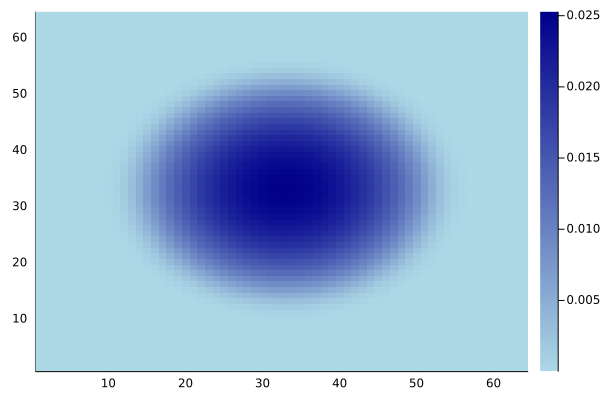

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)